In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

%matplotlib inline

### Read the file 

In [2]:
df=pd.read_excel("SALESDATA.xls")
df.head(5)

,CustKey,DateKey,Discount Amount,Invoice Date,Invoice Number,Item Class,Item Number,Item,Line Number,List Price,...,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep,U/M,Unnamed: 20,Unnamed: 21
0,10000481,2017-04-30,-237.91,2017-04-30,100012,NaN,NaN,Urban Large Eggs,2000,0.00,...,237.91,0.00,0.0,237.91,237.910000,1,184,EA,NaN,U/M = unit of measure
1,10002220,2017-07-14,368.79,2017-07-14,100233,P01,20910,Moms Sliced Turkey,1000,824.96,...,456.17,824.96,0.0,456.17,456.170000,1,127,EA,NaN,NaN
2,10002220,2017-10-17,109.73,2017-10-17,116165,P01,38076,Cutting Edge Foot-Long Hot Dogs,1000,548.66,...,438.93,548.66,0.0,438.93,438.930000,1,127,EA,NaN,EA = each
3,10002489,2017-06-03,-211.75,2017-06-03,100096,NaN,NaN,Kiwi Lox,1000,0.00,...,211.75,0.00,0.0,211.75,211.750000,1,160,EA,NaN,NaN
4,10004516,2017-05-27,96627.94,2017-05-27,103341,P01,60776,High Top Sweet Onion,1000,408.52,...,89248.66,185876.60,0.0,89248.66,196.150901,455,124,SE,NaN,SE = some SI unit like kgs or gallons


#### Calling Calling info() on our dataset tells us tons of information about our data frame like the data type of our features, and the memory usage.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65282 entries, 0 to 65281
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   CustKey                           65282 non-null  int64         
 1   DateKey                           65282 non-null  datetime64[ns]
 2   Discount Amount                   65280 non-null  float64       
 3   Invoice Date                      65282 non-null  datetime64[ns]
 4   Invoice Number                    65282 non-null  int64         
 5   Item Class                        56993 non-null  object        
 6   Item Number                       65241 non-null  object        
 7   Item                              65282 non-null  object        
 8   Line Number                       65282 non-null  int64         
 9   List Price                        65282 non-null  float64       
 10  Order Number                      65282 non-nu

## Seperating features into categorical and numerical

In [4]:
cat_df = df.select_dtypes(include=['object'])
num_df = df.select_dtypes(exclude=['object'])

def printColumnTypes(non_numeric_df, numeric_df):
    '''separates non-numeric and numeric columns'''
    print("Non-Numeric columns:")
    for col in non_numeric_df:
        print(f"{col}")
    print("")
    print("Numeric columns:")
    for col in numeric_df:
        print(f"{col}")
        
printColumnTypes(cat_df, num_df)

Non-Numeric columns:
Item Class
Item Number
Item
U/M
Unnamed: 21

Numeric columns:
CustKey
DateKey
Discount Amount
Invoice Date
Invoice Number
Line Number
List Price
Order Number
Promised Delivery Date
Sales Amount
Sales Amount Based on List Price
Sales Cost Amount
Sales Margin Amount
Sales Price
Sales Quantity
Sales Rep
Unnamed: 20


# Clean the Data!
## Columns with missing values
### The two common methods to deal with missing values are 
#### 1. Dropping the rows / columns 
#### 2. Imputing them based on other observations i.e. the mean or median

In [5]:
df.isnull().sum()

CustKey                                 0
DateKey                                 0
Discount Amount                         2
Invoice Date                            0
Invoice Number                          0
Item Class                           8289
Item Number                            41
Item                                    0
Line Number                             0
List Price                              0
Order Number                            0
Promised Delivery Date                  0
Sales Amount                            0
Sales Amount Based on List Price        0
Sales Cost Amount                       0
Sales Margin Amount                     0
Sales Price                             1
Sales Quantity                          0
Sales Rep                               0
U/M                                     0
Unnamed: 20                         65282
Unnamed: 21                         65278
dtype: int64

#### Since Item Number and Item Class are not necessarily affecting the Profit or Sales Price we can ignore it.

#### The Sales price column has one null value; With this method, we impute the missing values with the mean

In [6]:
price_mean_value = round(df['Sales Price'].mean(), 2)
df['Sales Price'].fillna(price_mean_value, inplace=True)

#### There are two null values in discount amount col; we can replace this with 0

In [7]:
df.fillna({'Discount Amount':0}, inplace=True)

#### Checking if DateKey and Invoice Date Col are identical

In [8]:
df['DateKey'].equals(df['Invoice Date'])

True

#### Drop all unecessary Cols

In [9]:
colsToDrop = ['DateKey', 'Item Class', 'Item Number', 'U/M', 'Unnamed: 20', 'Unnamed: 21']

df.drop(colsToDrop, axis=1, inplace=True)

In [10]:
df.head(5)

,CustKey,Discount Amount,Invoice Date,Invoice Number,Item,Line Number,List Price,Order Number,Promised Delivery Date,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep
0,10000481,-237.91,2017-04-30,100012,Urban Large Eggs,2000,0.00,200015,2017-04-30,237.91,0.00,0.0,237.91,237.910000,1,184
1,10002220,368.79,2017-07-14,100233,Moms Sliced Turkey,1000,824.96,200245,2017-07-14,456.17,824.96,0.0,456.17,456.170000,1,127
2,10002220,109.73,2017-10-17,116165,Cutting Edge Foot-Long Hot Dogs,1000,548.66,213157,2017-10-16,438.93,548.66,0.0,438.93,438.930000,1,127
3,10002489,-211.75,2017-06-03,100096,Kiwi Lox,1000,0.00,200107,2017-06-03,211.75,0.00,0.0,211.75,211.750000,1,160
4,10004516,96627.94,2017-05-27,103341,High Top Sweet Onion,1000,408.52,203785,2017-05-28,89248.66,185876.60,0.0,89248.66,196.150901,455,124


In [11]:
df.to_csv('cleaned_data.csv')

# Exploratory Analysis of the Data
## Characteristics of the data

In [12]:
df.describe()

,CustKey,Discount Amount,Invoice Number,Line Number,List Price,Order Number,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep
count,6.528200e+04,65282.000000,65282.000000,65282.000000,65282.000000,65282.000000,65282.000000,65282.000000,65282.000000,65282.000000,65282.000000,65282.000000,65282.000000
mean,1.001770e+07,1855.517987,216223.662020,23713.849790,514.693380,180583.064352,2852.038373,4707.473613,1660.979228,1191.059145,283.615913,45.084311,137.422398
std,7.176148e+03,9037.008289,94992.281866,32664.024053,449.189182,67593.871116,15164.342107,20696.443785,9556.485250,5860.787502,252.874782,429.661793,26.643936
min,1.000045e+07,-255820.800000,100012.000000,1000.000000,0.000000,100838.000000,200.010000,0.000000,0.000000,-3932.930000,-5000.000000,-1.000000,103.000000
25%,1.001272e+07,246.030000,117931.000000,3000.000000,181.560000,115321.000000,308.387500,561.040000,167.790000,129.950000,100.070000,2.000000,113.000000
50%,1.001966e+07,441.760000,222869.500000,12000.000000,325.190000,203702.000000,553.940000,998.160000,304.500000,246.490000,183.758250,3.000000,134.000000
75%,1.002351e+07,999.760000,314318.750000,32000.000000,803.860000,218576.000000,1280.042500,2315.040000,687.320000,579.530000,448.220000,8.000000,160.000000
max,1.002758e+07,343532.660000,332842.000000,344000.000000,2760.700000,321532.000000,555376.000000,632610.160000,366576.000000,188800.000000,6035.000000,16000.000000,185.000000


## Overall Sales Trend

In [13]:
df['Invoice Date'].max()

Timestamp('2019-12-31 00:00:00')

In [14]:
# Getting month Year
df['Month_Year'] = df['Invoice Date'].apply(lambda x: x.strftime('%Y-%m'))

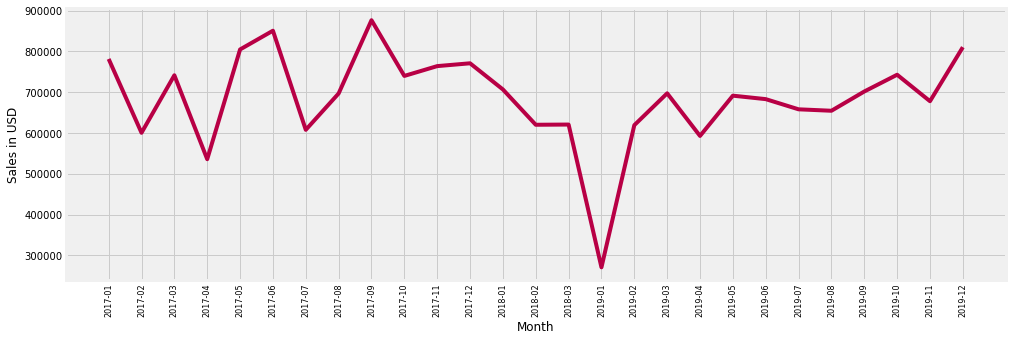

In [15]:
results = df.groupby('Month_Year').sum()
months = [month for month, df in df.groupby('Month_Year')]
plt.figure(figsize=(15,5))
plt.plot(months,results['Sales Price'], color = '#b80045')
plt.xticks(months, rotation='vertical', size = 8)
plt.ylabel('Sales in USD')
plt.xlabel('Month')
plt.show()

## MoM Growth

In [16]:
MoM_Data = pd.DataFrame(results['Sales Price'])

In [17]:
MoM_Data['Last_Month'] = np.roll(MoM_Data['Sales Price'],1)

In [18]:
MoM_Data = MoM_Data.drop(MoM_Data.index[0])
MoM_Data['Growth'] = (MoM_Data['Sales Price']/MoM_Data['Last_Month'])-1
MoM_Data.head()

,Sales Price,Last_Month,Growth
Month_Year,,,
2017-02,600460.161869,781317.138966,-0.231477
2017-03,741311.980741,600460.161869,0.234573
2017-04,535719.783362,741311.980741,-0.277336
2017-05,804600.227856,535719.783362,0.501905
2017-06,850540.174847,804600.227856,0.057097


In [19]:
results = MoM_Data.drop(columns = ["Sales Price", "Last_Month"])
results['Months'] = results.index
results.reset_index(drop=True, inplace=True)
results.head()

,Growth,Months
0,-0.231477,2017-02
1,0.234573,2017-03
2,-0.277336,2017-04
3,0.501905,2017-05
4,0.057097,2017-06


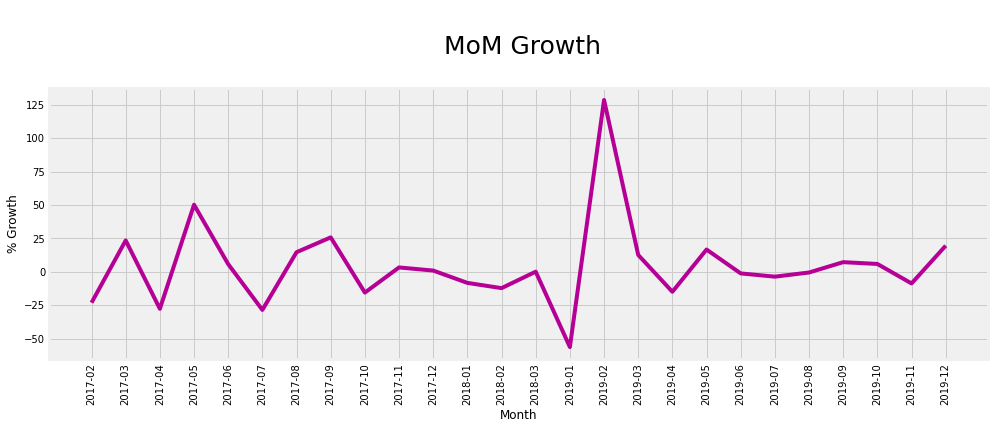

In [20]:
plt.figure(figsize=(15,5))
plt.plot(results['Months'],results['Growth']*100, color = '#b60095')
plt.xticks(results['Months'], rotation='vertical', size = 10)
plt.ylabel('% Growth')
plt.xlabel('Month')
plt.title("\n MoM Growth\n", size=25)
plt.show()

## YoY Growth

In [21]:
YoY_Data = pd.DataFrame(df.groupby('Month_Year').sum()['Sales Price'])
YoY_Data['Last_Year'] = np.roll(YoY_Data['Sales Price'],12)
YoY_Data = YoY_Data.drop(YoY_Data.index[0:12])
YoY_Data.head()

,Sales Price,Last_Year
Month_Year,,
2018-01,706622.651847,781317.138966
2018-02,620099.987458,600460.161869
2018-03,620615.304779,741311.980741
2019-01,270807.438237,535719.783362
2019-02,619094.828742,804600.227856


In [22]:
YoY_Data['Growth'] = (YoY_Data['Sales Price']/YoY_Data['Last_Year'])-1
YoY_Data.head()

,Sales Price,Last_Year,Growth
Month_Year,,,
2018-01,706622.651847,781317.138966,-0.095601
2018-02,620099.987458,600460.161869,0.032708
2018-03,620615.304779,741311.980741,-0.162815
2019-01,270807.438237,535719.783362,-0.494498
2019-02,619094.828742,804600.227856,-0.230556


In [23]:
results = YoY_Data.drop(columns = ["Sales Price", "Last_Year"])
results['Month_Year'] = results.index
results.reset_index(drop=True, inplace=True)
results.head()

,Growth,Month_Year
0,-0.095601,2018-01
1,0.032708,2018-02
2,-0.162815,2018-03
3,-0.494498,2019-01
4,-0.230556,2019-02


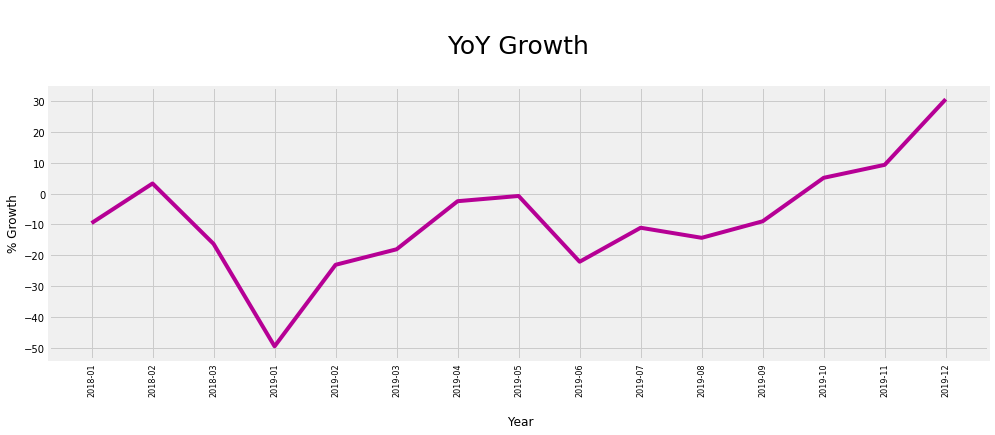

In [24]:
plt.figure(figsize=(15,5))
plt.plot(results['Month_Year'],results['Growth']*100, color = '#b60095')
plt.xticks(results['Month_Year'], rotation='vertical', size = 8)
plt.ylabel('% Growth')
plt.xlabel('\n Year')
plt.title("\n YoY Growth \n", size=25)
plt.show()

## What are the top 10 Products in terms of Profit

In [25]:
prod_sales=pd.DataFrame(df.groupby('Item').sum()['Sales Price'])
prod_sales=prod_sales.sort_values('Sales Price', ascending = False).astype('int')
prod_sales[:10]

,Sales Price
Item,
Better Fancy Canned Sardines,1263261
Red Spade Foot-Long Hot Dogs,937366
Discover Manicotti,765222
Ebony Prepared Salad,723557
Imagine Popsicles,693747
Atomic Mint Chocolate Bar,578217
Red Spade Turkey Hot Dogs,540077
Moms Sliced Turkey,487833
Bravo Large Canned Shrimp,471849


Text(0, 0.5, 'SALES PRICE')

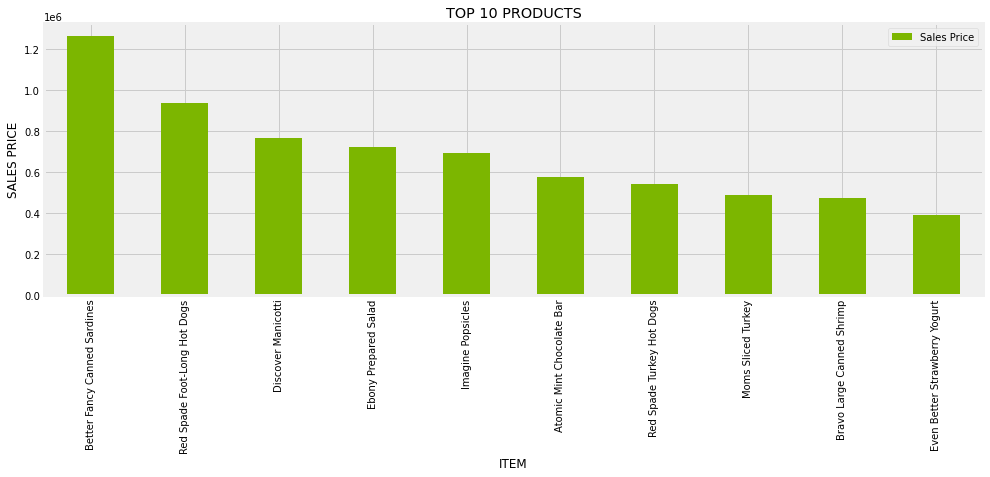

In [40]:
prod_sales[:10].plot(kind='bar' , title = 'TOP 10 PRODUCTS', figsize=(15,5), color = '#7cb600')
plt.xlabel("ITEM")
plt.ylabel("SALES PRICE")

##  What are the 10 Products in terms of loss

In [27]:
prod_loss=pd.DataFrame(df.groupby('Item').sum()['Sales Price'])
prod_loss=prod_sales.sort_values('Sales Price', ascending = True).astype('int')
prod_loss[:10]

,Sales Price
Item,
Great Bagels,1
Great White Bread,3
Super Hot Chocolate,8
Excellent Cranberry Juice,9
Pearl Light Wine,10
Best Choice Salsa Dip,13
Club 1% Milk,16
Choice Semi-Sweet Chocolate Bar,17
Gorilla Head Cheese,20


Text(0, 0.5, 'SALES PRICE')

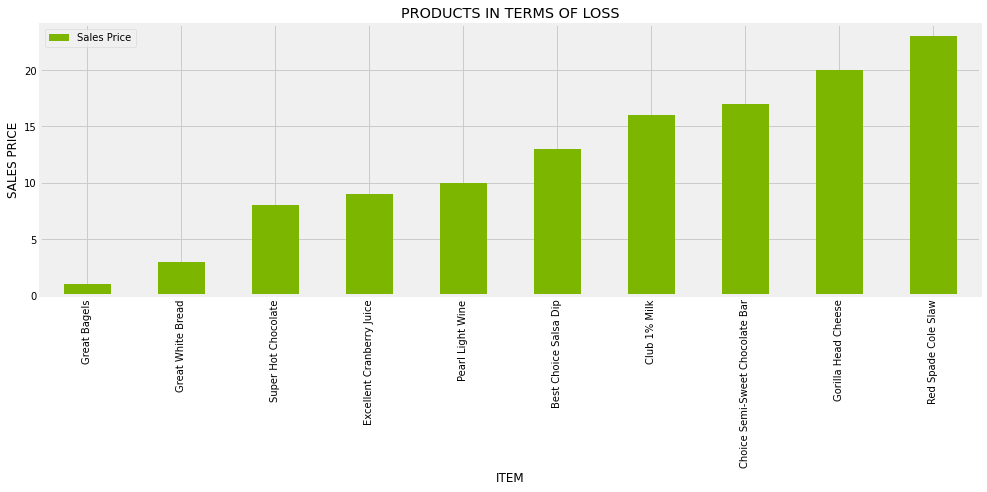

In [42]:
prod_loss[:10].plot(kind='bar', title = 'PRODUCTS IN TERMS OF LOSS', figsize=(15,5), color = '#7cb600')
plt.xlabel("ITEM")
plt.ylabel("SALES PRICE")

## What Products sold the most?

In [29]:
most_prod=pd.DataFrame(df.groupby('Item').sum()['Sales Quantity'])
most_prod=most_prod.sort_values('Sales Quantity', ascending=False)
most_prod.head(5)

,Sales Quantity
Item,
Better Large Canned Shrimp,590343
High Top Dried Mushrooms,377259
Better Canned Tuna in Oil,266996
Walrus Chardonnay,212022
Red Spade Pimento Loaf,163296


Text(0, 0.5, 'SALES QUANTITY')

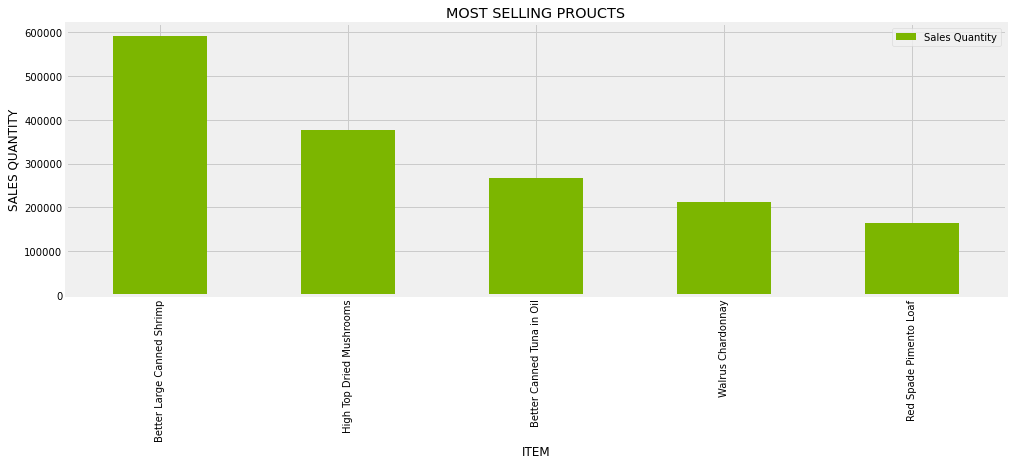

In [43]:
most_prod[:5].plot(kind='bar', title = 'MOST SELLING PROUCTS', figsize=(15,5), color = '#7cb600')
plt.xlabel("ITEM")
plt.ylabel("SALES QUANTITY")

## What products are most often sold together

In [31]:
often_sold=df[df['Order Number'].duplicated(keep=False)]

often_sold['Grouped']=often_sold.groupby('Order Number')['Item'].transform(lambda x: ','.join(x))

often_sold = often_sold[['Order Number', 'Grouped']].drop_duplicates()

often_sold.head()

<ipython-input-31-a964ed26fa7a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  often_sold['Grouped']=often_sold.groupby('Order Number')['Item'].transform(lambda x: ','.join(x))


,Order Number,Grouped
4,203785,"High Top Sweet Onion,Best Choice Fudge Brownies"
7,205213,"Tell Tale Garlic,High Top Walnuts,Big Time Fro..."
12,200478,"Better Fancy Canned Sardines,Red Spade Low Fat..."
17,202989,"Landslide Columbian Coffee,High Top Dried Mush..."
21,205041,"Ebony Prepared Salad,Bravo Canned Yams,Moms Sl..."


In [32]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in often_sold['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(5):
    print(key, value)

('Landslide White Sugar', 'Landslide White Sugar') 564
('Ebony Prepared Salad', 'Imagine Popsicles') 307
('Ebony Prepared Salad', 'Moms Sliced Turkey') 303
('Better Fancy Canned Sardines', 'Ebony Prepared Salad') 302
('Better Fancy Canned Sardines', 'Imagine Popsicles') 285


## Which is the most expensive item ordered

In [33]:
most_expensive=pd.DataFrame(df.sort_values(by = "Sales Price", ascending = False))
most_expensive = most_expensive[['Item','Sales Price','Sales Quantity']]
most_expensive.head(1)

,Item,Sales Price,Sales Quantity
18267,Atomic Semi-Sweet Chocolate Bar,6035.0,1


## What is the total Revenue

In [34]:
revenue = (df['Sales Quantity']* df['Sales Price']).sum()
print('Revenue was: $' + str(np.round(revenue,2)))

Revenue was: $186186367.19
